In [1]:
import pandas as pd
import numpy as np

In [2]:
df_booking=pd.read_csv("fact_bookings.csv")
df_booking.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [3]:
df_rooms=pd.read_csv("dim_rooms.csv")
df_rooms.head(5)


,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [4]:
df_hotels=pd.read_csv("dim_hotels.csv")
df_hotels.head(5)


,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [5]:
df_date=pd.read_csv("dim_date.csv")
df_date.head(5)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [6]:
df_booking.shape

(134590, 12)

In [7]:
df_rooms.shape

(4, 2)

In [8]:
df_hotels.shape

(25, 4)

In [9]:
df_date.shape

(92, 4)

In [10]:
df_booking.describe

<bound method NDFrame.describe of                booking_id  property_id booking_date check_in_date  \
0        May012216558RT11        16558     27-04-22      1/5/2022   
1        May012216558RT12        16558     30-04-22      1/5/2022   
2        May012216558RT13        16558     28-04-22      1/5/2022   
3        May012216558RT14        16558     28-04-22      1/5/2022   
4        May012216558RT15        16558     27-04-22      1/5/2022   
...                   ...          ...          ...           ...   
134585   Jul312217564RT46        17564     29-07-22      31-07-22   
134586   Jul312217564RT47        17564     30-07-22      31-07-22   
134587   Jul312217564RT48        17564     30-07-22      31-07-22   
134588   Jul312217564RT49        17564     29-07-22      31-07-22   
134589  Jul312217564RT410        17564     31-07-22      31-07-22   

       checkout_date  no_guests room_category booking_platform  ratings_given  \
0           2/5/2022       -3.0           RT1    direct 

In [11]:
df_booking.room_category.value_counts()

RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: room_category, dtype: int64

In [12]:
df_hotels.describe

<bound method NDFrame.describe of     property_id  property_name  category       city
0         16558   Atliq Grands    Luxury      Delhi
1         16559  Atliq Exotica    Luxury     Mumbai
2         16560     Atliq City  Business      Delhi
3         16561      Atliq Blu    Luxury      Delhi
4         16562      Atliq Bay    Luxury      Delhi
5         16563   Atliq Palace  Business      Delhi
6         17558   Atliq Grands    Luxury     Mumbai
7         17559  Atliq Exotica    Luxury     Mumbai
8         17560     Atliq City  Business     Mumbai
9         17561      Atliq Blu    Luxury     Mumbai
10        17562      Atliq Bay    Luxury     Mumbai
11        17563   Atliq Palace  Business     Mumbai
12        18558   Atliq Grands    Luxury  Hyderabad
13        18559  Atliq Exotica    Luxury  Hyderabad
14        18560     Atliq City  Business  Hyderabad
15        18561      Atliq Blu    Luxury  Hyderabad
16        18562      Atliq Bay    Luxury  Hyderabad
17        18563   Atliq Palace

In [13]:
df_hotels.property_name.value_counts()

Atliq Grands     4
Atliq Exotica    4
Atliq City       4
Atliq Blu        4
Atliq Bay        4
Atliq Palace     4
Atliq Seasons    1
Name: property_name, dtype: int64

In [14]:
df_hotels.city.value_counts()

Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: city, dtype: int64

In [15]:
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

<AxesSubplot:>

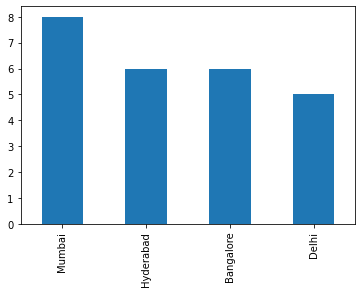

In [16]:
df_hotels.city.value_counts().plot(kind="bar")

In [17]:
df_agg_booking=pd.read_csv("fact_aggregated_bookings.csv")
df_agg_booking.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [18]:
df_agg_booking.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [19]:
df=df_agg_booking.groupby('property_id')['successful_bookings'].sum()
df

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [20]:
df_agg_booking.head(15)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
6,19558,1-May-22,RT1,25,40.0
7,19560,1-May-22,RT1,23,26.0
8,17561,1-May-22,RT1,22,NaN
9,16560,1-May-22,RT1,24,34.0


In [21]:
df_agg_booking_new= (df_agg_booking.where(df_agg_booking['successful_bookings'] > df_agg_booking['capacity'])).value_counts()

In [22]:
print(df_agg_booking_new)

property_id  check_in_date  room_category  successful_bookings  capacity
16563.0      1-May-22       RT1            100.0                41.0        1
17558.0      1-May-22       RT1            30.0                 19.0        1
18563.0      31-Jul-22      RT4            20.0                 18.0        1
19558.0      11-Jun-22      RT2            50.0                 39.0        1
19559.0      25-Jul-22      RT1            35.0                 24.0        1
19560.0      2-Jul-22       RT1            123.0                26.0        1
dtype: int64


# Data Cleaning

In [23]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [24]:
df_booking.where(df_booking['no_guests']<0).value_counts()


booking_id         property_id  booking_date  check_in_date  checkout_date  no_guests  room_category  booking_platform  ratings_given  booking_status  revenue_generated  revenue_realized
Jul312217564RT47   17564.0      30-07-22      31-07-22       1/8/2022       -4.0       RT4            logtrip           2.0            Checked Out     38760.0            38760.0             1
May012216558RT11   16558.0      27-04-22      1/5/2022       2/5/2022       -3.0       RT1            direct online     1.0            Checked Out     10010.0            10010.0             1
May122218562RT311  18562.0      5/5/2022      12/5/2022      17-05-22       -6.0       RT3            direct offline    5.0            Checked Out     16800.0            16800.0             1
dtype: int64

In [25]:
df_booking['no_guests'].fillna(0.0,inplace=True)
df_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [26]:
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [27]:
df_booking['no_guests'].isnull().sum()

0

In [28]:
df_booking.shape

(134590, 12)

In [29]:
df_booking=df_booking[df_booking.no_guests>0]
df_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [30]:
df_booking.shape

(134578, 12)

In [31]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134578.000000,134578.000000,56679.000000,1.345780e+05,134578.000000
mean,18061.143315,2.036744,3.619048,1.537804e+04,12696.011822
std,1093.053454,1.031710,1.234970,9.304015e+04,6927.841641
min,16558.000000,1.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [32]:
df_booking.revenue_generated.min(), df_booking.revenue_generated.max()

(6500, 28560000)

In [33]:
avg,std=df_booking.revenue_generated.mean(),df_booking.revenue_generated.std()
avg,std

(15378.036937686695, 93040.15493143328)

In [34]:
higher_limit=avg+3*std
higher_limit

294498.50173198653

In [35]:
df_booking=df_booking[df_booking.revenue_generated <=higher_limit]

In [36]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134573.000000,134573.000000,56676.000000,134573.000000,134573.000000
mean,18061.191658,2.036716,3.619045,14915.959776,12695.983585
std,1093.042273,1.031673,1.234983,6452.676164,6927.791692
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [37]:
 df_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [38]:
df_booking.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [39]:
avg,std=df_booking.revenue_realized.mean(),df_booking.revenue_realized.std()
avg,std

(12695.983585117372, 6927.791692242509)

In [40]:
higher_limit_rr=avg+3*std
higher_limit_rr

33479.3586618449

In [41]:
df_booking[df_booking.revenue_realized>higher_limit_rr]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [42]:
avg_rt4,std_rt4=df_booking[df_booking.room_category=='RT4'].revenue_realized.mean(),df_booking[df_booking.room_category=='RT4'].revenue_realized.std()
avg_rt4,std_rt4

(23439.308443780723, 9048.599075739625)

In [43]:
df_booking[df_booking.room_category=='RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [44]:
23439.308444+3*9048.599076

50585.105672000005

In [45]:
df_booking.isna().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [46]:
df_agg_booking.isna().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [48]:
df_agg_booking.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [49]:
df_agg_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [50]:
df_agg_booking.capacity.mean()

25.280495759947815

In [51]:
df_agg_booking.capacity.fillna(value=df_agg_booking.capacity.mean(),inplace=True)
df_agg_booking

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [52]:
df_agg_booking.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9200.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.440837
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [53]:
 df_agg_booking.isna().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [54]:
 df_agg_booking.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [55]:
df_agg_booking_new=df_agg_booking[df_agg_booking.successful_bookings>df_agg_booking.capacity]
df_agg_booking_new

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [56]:
df_agg_booking_new.describe()

,property_id,successful_bookings,capacity
count,6.000000,6.000000,6.000000
mean,18560.166667,59.666667,27.833333
std,1263.805905,41.936460,9.907909
min,16563.000000,20.000000,18.000000
25%,17809.250000,31.250000,20.250000
50%,19060.500000,42.500000,25.000000
75%,19558.750000,87.500000,35.750000
max,19560.000000,123.000000,41.000000


Data transformation


In [57]:
df_agg_booking.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0


In [59]:
df_agg_booking['occ_pct']=(df_agg_booking['successful_bookings']/df_agg_booking['capacity'])*100

In [60]:
df_agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
3,17558,1-May-22,RT1,30,19.0,157.894737
4,16558,1-May-22,RT1,18,19.0,94.736842


Insight Generation

What is the avg occupancy rate in each room category?

In [61]:
x=df_agg_booking.groupby("room_category")['occ_pct'].mean()
x

room_category
RT1    58.232060
RT2    58.040234
RT3    58.028291
RT4    59.300161
Name: occ_pct, dtype: float64

In [62]:
df_agg_booking.head(5)


,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
3,17558,1-May-22,RT1,30,19.0,157.894737
4,16558,1-May-22,RT1,18,19.0,94.736842


In [63]:
df_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [64]:
df=pd.merge(df_agg_booking,df_hotels,on="property_id")
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.333333,Atliq Exotica,Luxury,Mumbai
1,16559,1-May-22,RT2,35,41.0,85.365854,Atliq Exotica,Luxury,Mumbai
2,16559,1-May-22,RT3,27,32.0,84.375000,Atliq Exotica,Luxury,Mumbai
3,16559,1-May-22,RT4,17,18.0,94.444444,Atliq Exotica,Luxury,Mumbai
4,16559,2-May-22,RT1,20,30.0,66.666667,Atliq Exotica,Luxury,Mumbai


In [65]:
df.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    58.23
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [66]:
df_rooms.head(5)

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [67]:
df_date.head(5)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [68]:
df=pd.merge(df,df_date,left_on="check_in_date",right_on="date")
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT2,25,41.0,60.975610,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT1,18,30.0,60.000000,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.500000,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.222222,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.000000,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,17564,31-Jul-22,RT4,10,17.0,58.823529,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend
6496,18560,31-Jul-22,RT1,22,30.0,73.333333,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6497,18560,31-Jul-22,RT2,34,40.0,85.000000,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6498,18560,31-Jul-22,RT3,17,24.0,70.833333,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend


In [69]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

<AxesSubplot:xlabel='city'>

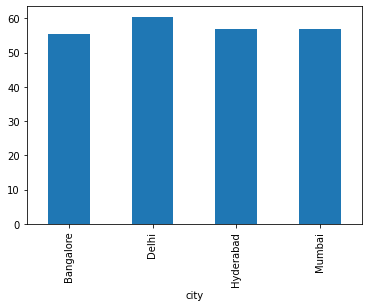

In [70]:
df.groupby("city")["occ_pct"].mean().plot(kind="bar")

<AxesSubplot:xlabel='day_type'>

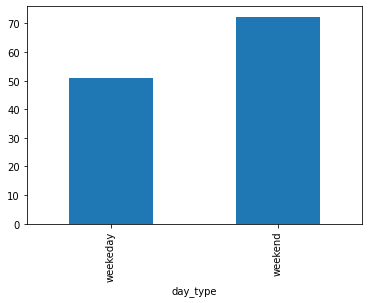

In [71]:
df.groupby("day_type")["occ_pct"].mean().plot(kind="bar")

In [72]:
df_jun_22=df[df["mmm yy"]=="Jun 22"]
df_jun_22

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.666667,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,63.414634,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,62.500000,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2203,16559,10-Jun-22,RT4,11,18.0,61.111111,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,19562,10-Jun-22,RT1,19,30.0,63.333333,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,17564,30-Jun-22,RT4,7,17.0,41.176471,Atliq Seasons,Business,Mumbai,30-Jun-22,Jun 22,W 27,weekeday
4296,18560,30-Jun-22,RT2,24,40.0,60.000000,Atliq City,Business,Hyderabad,30-Jun-22,Jun 22,W 27,weekeday
4297,18560,30-Jun-22,RT1,18,30.0,60.000000,Atliq City,Business,Hyderabad,30-Jun-22,Jun 22,W 27,weekeday
4298,18560,30-Jun-22,RT3,14,24.0,58.333333,Atliq City,Business,Hyderabad,30-Jun-22,Jun 22,W 27,weekeday


<AxesSubplot:xlabel='city'>

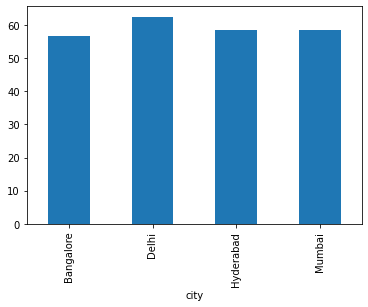

In [73]:
df_jun_22.groupby("city")["occ_pct"].mean().plot(kind="bar")

In [74]:
df_jun_22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: occ_pct, dtype: float64

In [75]:
df_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [76]:
df_booking.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [77]:
df=pd.merge(df_hotels,df_booking,on="property_id")
df

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT16,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
3,16558,Atliq Grands,Luxury,Delhi,May012216558RT17,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,16558,Atliq Grands,Luxury,Delhi,May012216558RT18,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT45,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134569,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT46,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134570,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT48,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134571,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT49,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


AttributeError: 'AxesSubplot' object has no attribute 'sort_value'

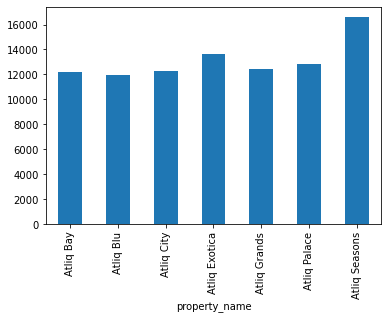

In [78]:
df.groupby("property_name")["revenue_realized"].mean().plot(kind="bar").sort_value()

AttributeError: 'AxesSubplot' object has no attribute 'sort_values'

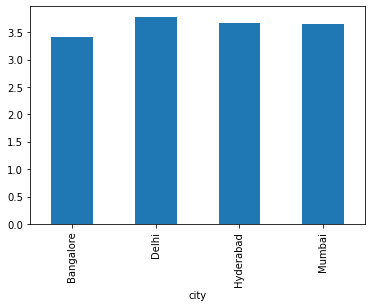

In [79]:
df.groupby("city")["ratings_given"].mean().plot(kind="bar").sort_values()

In [80]:
df.head(5)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT16,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
3,16558,Atliq Grands,Luxury,Delhi,May012216558RT17,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,16558,Atliq Grands,Luxury,Delhi,May012216558RT18,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


<AxesSubplot:ylabel='revenue_realized'>

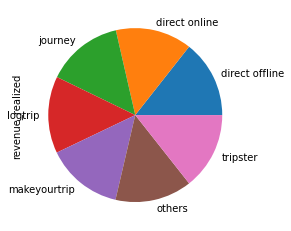

In [81]:
df.groupby("booking_platform")["revenue_realized"].mean().plot(kind="pie")